In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [5]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

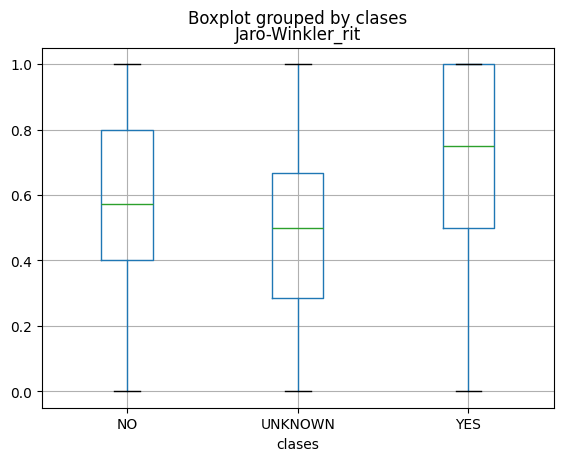

In [6]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [7]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,,0,,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,,0,,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,,0,,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,,0,,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,,0,,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,,0,,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,,0,,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,,0,,1.000000,NO


In [8]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,,0,,0.666667,YES
16,1.389238,2.871445,2.151,1.871,3.934430,0.004554,0.285345,0,0.125000,1,7,2,16,0.714286,0,,0,,0.750000,YES
25,1.858186,1.464642,2.498,1.329,3.887436,0.004578,0.291467,0,0.030303,0,4,1,33,0.500000,0,,0,,0.666667,YES
27,-0.053825,1.481927,2.117,1.335,3.875875,0.003966,0.090035,0,0.076923,0,4,1,13,0.000000,0,,0,,0.333333,YES
31,2.058963,1.441614,1.799,1.714,3.924461,0.006038,0.352919,0,0.043478,0,5,1,23,0.600000,0,,0,,0.333333,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2.594912,1.434798,2.070,1.902,4.077736,0.002682,0.741229,1,0.058824,0,6,1,17,0.833333,0,,0,,0.500000,YES
779,2.378852,1.463399,2.044,2.065,3.936022,0.003553,0.389897,0,0.040000,0,7,1,25,0.571429,0,,0,,0.500000,YES
791,2.019526,1.452324,2.180,2.017,3.949004,0.003593,0.378576,1,0.055556,0,6,1,18,0.833333,1,make,0,,0.250000,YES
794,2.117322,1.436944,1.805,1.675,3.965707,0.004654,0.309267,1,0.037037,0,13,1,27,0.769231,0,,0,,0.600000,YES


In [9]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [10]:
train=train.drop(["verbT","verbH"],axis=1)

In [11]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.987,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,0.000000,1.687,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,27,1.000000,0,0,0.333333,NO
2,1.878734,1.455456,1.962,2.178,3.867700,0.006142,0.465936,1,0.041667,0,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,38,1.000000,0,0,0.333333,YES
4,1.344579,1.449291,1.949,2.192,3.937175,0.005018,0.381601,0,0.076923,0,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.624779,1.420225,1.900,1.805,3.849615,0.003770,0.329502,0,0.062500,0,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,0.000000,1.995,0.000,0.000000,0.000000,0.000000,0,0.000000,0,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,0.000000,1.491,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,19,0.666667,0,0,0.500000,UNKNOWN
798,0.000000,0.000000,1.667,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,22,0.400000,0,0,1.000000,NO


In [12]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [13]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [14]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.380516,0.170982,0.806164,0.729235,0.325570,0.838094,-0.025013,0.209917,0.145586,0.054347,0.367811,0.263239,-0.224711,0.040579,0.023015,-0.193057
distancias,0.380516,1.000000,-0.032122,0.609320,0.591825,0.385907,0.431178,0.187226,0.862845,0.158406,0.408470,0.998351,-0.043057,-0.443372,-0.027805,0.000035,-0.389190
entropia_total,0.170982,-0.032122,1.000000,0.139166,0.058154,0.030979,0.123999,0.000558,-0.011814,-0.019729,0.124274,-0.046124,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806164,0.609320,0.139166,1.000000,0.952947,0.511125,0.862521,0.052815,0.526848,0.155453,0.089814,0.595123,-0.057895,-0.367171,-0.014776,0.031607,-0.314679
mutinf,0.729235,0.591825,0.058154,0.952947,1.000000,0.526583,0.806968,0.056488,0.501505,0.121733,0.083114,0.575357,-0.046024,-0.348537,-0.023843,0.031644,-0.307829
mearts,0.325570,0.385907,0.030979,0.511125,0.526583,1.000000,0.369870,0.044431,0.369273,0.101044,0.076707,0.391992,-0.071677,-0.228246,-0.043620,-0.000967,-0.249332
max_info,0.838094,0.431178,0.123999,0.862521,0.806968,0.369870,1.000000,-0.002472,0.347633,0.172898,0.026104,0.418572,0.008134,-0.275463,0.012183,0.045133,-0.206246
list_comp,-0.025013,0.187226,0.000558,0.052815,0.056488,0.044431,-0.002472,1.000000,0.199237,0.014700,0.206528,0.186680,-0.088236,-0.095414,0.023143,-0.017945,-0.287149
diferencias,0.209917,0.862845,-0.011814,0.526848,0.501505,0.369273,0.347633,0.199237,1.000000,0.152830,0.347104,0.865500,-0.319952,-0.407806,-0.060520,-0.003014,-0.342024
list_incomp,0.145586,0.158406,-0.019729,0.155453,0.121733,0.101044,0.172898,0.014700,0.152830,1.000000,0.065502,0.160399,-0.021058,-0.050931,-0.001632,0.076916,0.026277


<Axes: >

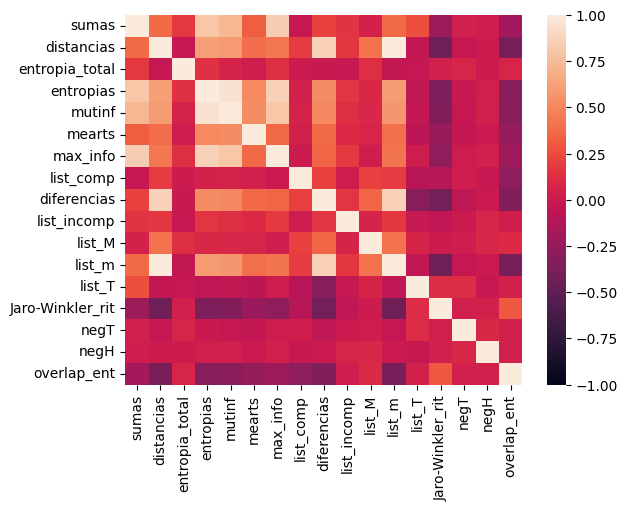

In [15]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [16]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.380516,0.170982,0.806164,0.729235,0.325570,0.838094,-0.025013,0.209917,0.145586,0.054347,0.367811,0.263239,-0.224711,0.040579,0.023015,-0.193057
distancias,0.380516,1.000000,-0.032122,0.609320,0.591825,0.385907,0.431178,0.187226,0.862845,0.158406,0.408470,0.998351,-0.043057,-0.443372,-0.027805,0.000035,-0.389190
entropia_total,0.170982,-0.032122,1.000000,0.139166,0.058154,0.030979,0.123999,0.000558,-0.011814,-0.019729,0.124274,-0.046124,-0.033983,0.042591,0.073999,0.004923,0.076146
entropias,0.806164,0.609320,0.139166,1.000000,0.952947,0.511125,0.862521,0.052815,0.526848,0.155453,0.089814,0.595123,-0.057895,-0.367171,-0.014776,0.031607,-0.314679
mutinf,0.729235,0.591825,0.058154,0.952947,1.000000,0.526583,0.806968,0.056488,0.501505,0.121733,0.083114,0.575357,-0.046024,-0.348537,-0.023843,0.031644,-0.307829
mearts,0.325570,0.385907,0.030979,0.511125,0.526583,1.000000,0.369870,0.044431,0.369273,0.101044,0.076707,0.391992,-0.071677,-0.228246,-0.043620,-0.000967,-0.249332
max_info,0.838094,0.431178,0.123999,0.862521,0.806968,0.369870,1.000000,-0.002472,0.347633,0.172898,0.026104,0.418572,0.008134,-0.275463,0.012183,0.045133,-0.206246
list_comp,-0.025013,0.187226,0.000558,0.052815,0.056488,0.044431,-0.002472,1.000000,0.199237,0.014700,0.206528,0.186680,-0.088236,-0.095414,0.023143,-0.017945,-0.287149
diferencias,0.209917,0.862845,-0.011814,0.526848,0.501505,0.369273,0.347633,0.199237,1.000000,0.152830,0.347104,0.865500,-0.319952,-0.407806,-0.060520,-0.003014,-0.342024
list_incomp,0.145586,0.158406,-0.019729,0.155453,0.121733,0.101044,0.172898,0.014700,0.152830,1.000000,0.065502,0.160399,-0.021058,-0.050931,-0.001632,0.076916,0.026277


In [17]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [18]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [62]:
y_train.count(0)

80

In [63]:
y_train.count(1)

412

In [64]:
y_train.count(2)

308

In [19]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

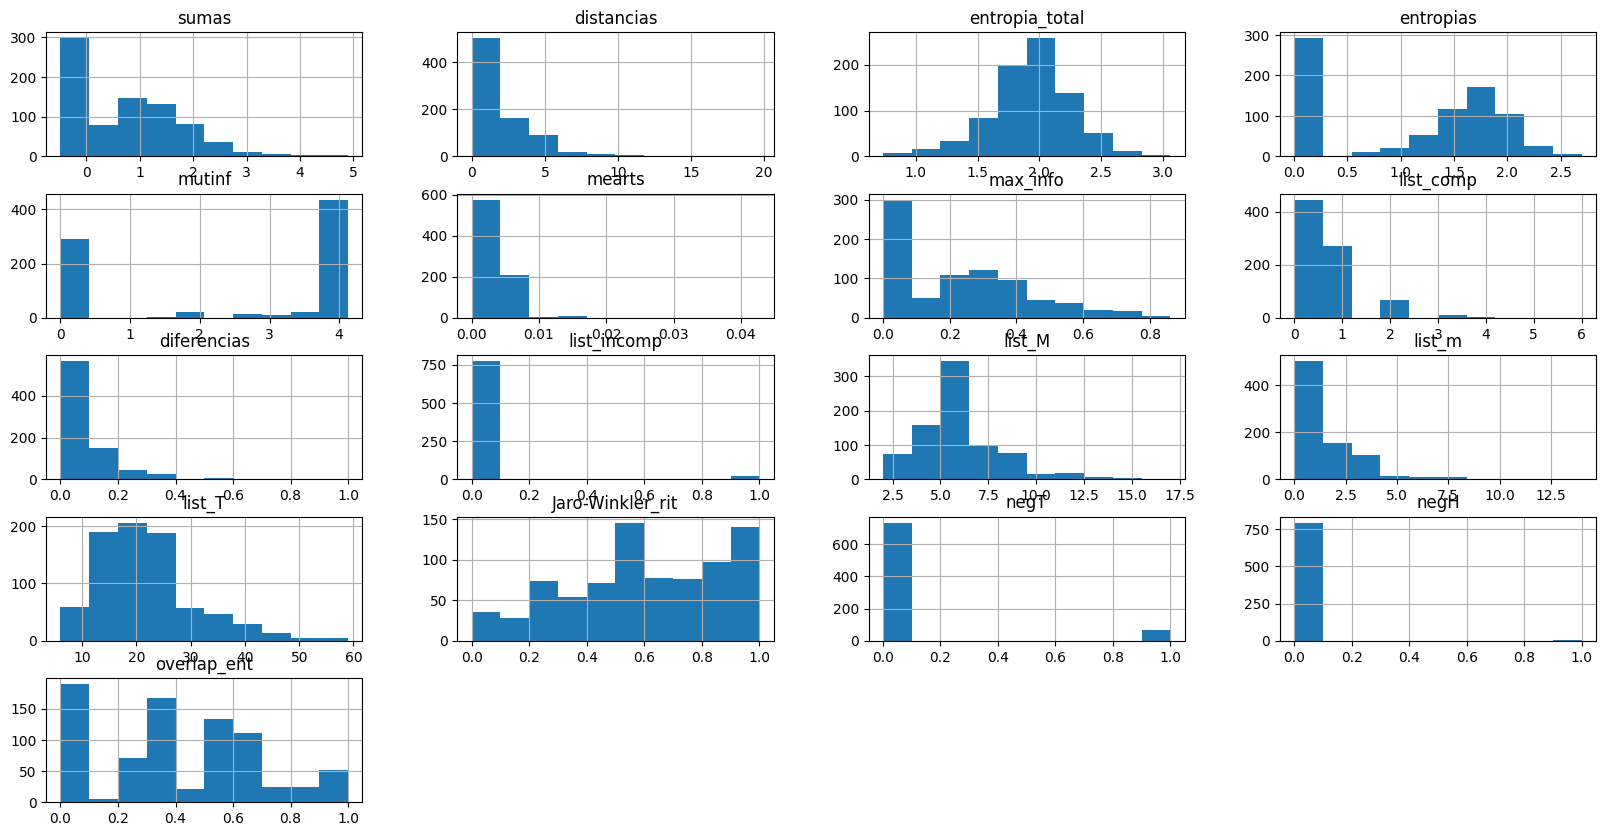

In [20]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [21]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [22]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,,0,,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,,0,,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,,0,,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,,0,,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,rush,0,,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,,0,,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,,0,,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,,0,,0.666667,UNKNOWN


In [23]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [24]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [25]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(39, 18)

In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.32244365, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.55112708, ..., 0.        , 0.        ,
        0.33333333],
       [0.38349007, 0.0740187 , 0.640967  , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.        , 0.48709572, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.54459327, ..., 0.        , 0.        ,
        1.        ],
       [0.32323126, 0.07505317, 0.61548514, ..., 0.        , 0.        ,
        0.66666667]])

In [30]:
X_train.shape

(800, 17)

In [31]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [32]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
model.decision_function(X_train)

array([[-0.56894967,  0.7747896 , -0.20583993],
       [-1.08318313,  1.33242034, -0.2492372 ],
       [-1.43417295,  0.95886906,  0.47530389],
       ...,
       [-0.59456184,  0.98663481, -0.39207297],
       [-0.35369281,  1.07645734, -0.72276453],
       [-1.15153434,  1.08085144,  0.0706829 ]])

In [34]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [35]:
model.classes_

array([0, 1, 2])

In [36]:
model.coef_[0]

array([-0.20653857, -0.24760716, -0.27008915, -0.36731644,  0.07938327,
       -0.5056252 ,  0.02738531, -1.26114741, -0.11452073,  0.55719658,
        0.15009532, -0.14813043, -0.84548734, -0.28735134,  0.5542194 ,
        0.99912665,  0.41020815])

In [37]:
coeficientes=model.coef_[0]

In [38]:
coeficientes

array([-0.20653857, -0.24760716, -0.27008915, -0.36731644,  0.07938327,
       -0.5056252 ,  0.02738531, -1.26114741, -0.11452073,  0.55719658,
        0.15009532, -0.14813043, -0.84548734, -0.28735134,  0.5542194 ,
        0.99912665,  0.41020815])

In [39]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  15 negH 7 list_comp


In [40]:

n_columns=train.shape[1]-1

In [41]:
n_columns

17

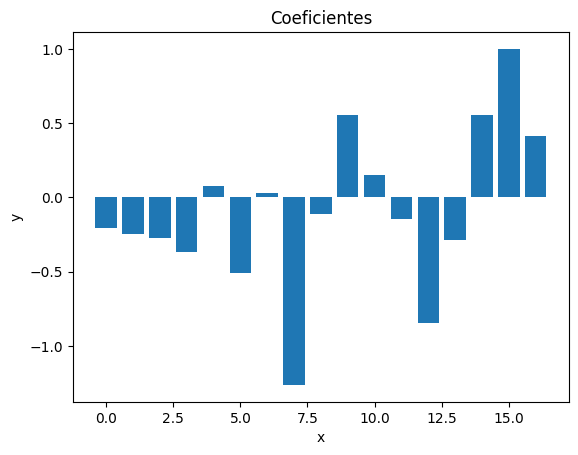

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [43]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06887561, 0.11002105, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

In [44]:
X_test.shape

(800, 17)

In [45]:
predictions = model.predict(X_test)

In [46]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,

In [47]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES,1
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES,1
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES,1
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES,1
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,0.500000,YES,1
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO,1
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN,1
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN,2


In [48]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
288,1.164592,2.886629,2.179,1.833,3.655588,0.004999,0.513491,0,0.2,0,5,2,10,0.8,1,1,0.75,YES,0


In [49]:
print(confusion_matrix(y_test, predictions))

[[  1  56  15]
 [  1 312  97]
 [  1 115 202]]


In [50]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.64
precision:  0.62
recall 0.64
f1_score:  0.61
matthews_score:  0.34


In [51]:
X_train.shape

(800, 17)

In [52]:
X_test.shape

(800, 17)

In [53]:
test=test.drop(["predicciones"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.231,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,0.000000,2.069,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,0.000000,1.765,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,0.000000,2.012,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,20,0.666667,0,0,1.000000,YES
4,1.216129,1.457741,1.691,1.861,3.880129,0.004272,0.201056,0,0.050000,0,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.080189,1.443651,2.198,2.042,3.839593,0.004145,0.490698,1,0.052632,1,5,1,19,0.400000,1,0,0.500000,YES
796,0.000000,0.000000,1.580,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,0.000000,1.828,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,0.366284,1.443915,1.767,0.881,3.781196,0.005778,0.129923,0,0.100000,0,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [54]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [55]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [56]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.660000 (0.108822)
Logistic Regression Precision:: 0.600000 (0.158720)
Logistic Regression Recall:: 0.660000 (0.108822)
Logistic Regression F1-score:: 0.620000 (0.142150)


In [59]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s


Logistic Regression Precision:: 0.440000 (0.091803)
Logistic Regression Recall:: 0.460000 (0.070007)
Logistic Regression F1-score:: 0.440000 (0.087859)


In [60]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.099365)
Logistic Regression Recall:: 0.660000 (0.099365)
Logistic Regression F1-score:: 0.660000 (0.099365)


In [57]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.340000 (0.221903)


In [56]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [119]:
#linear_model

In [120]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [61]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.65      0.76      0.70       410
           2       0.64      0.64      0.64       318

    accuracy                           0.64       800
   macro avg       0.54      0.47      0.45       800
weighted avg       0.62      0.64      0.61       800



In [62]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [63]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [64]:
explainer.expected_value

array([-0.98752318,  0.54185462,  0.44566856])

In [65]:
X_test

array([[0.        , 0.        , 0.75524712, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.70040623, ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.59749492, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.61882194, ..., 0.        , 0.        ,
        0.66666667],
       [0.06309664, 0.14040234, 0.59817197, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.        , 0.859174  , ..., 0.        , 0.        ,
        1.        ]])

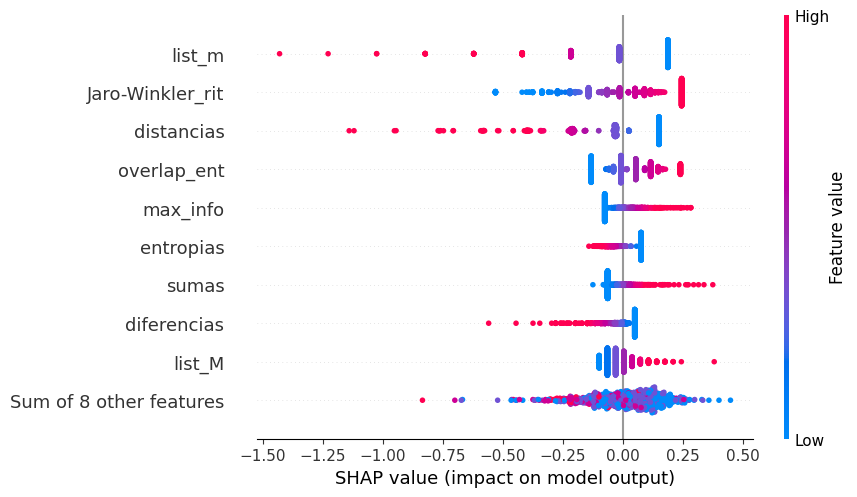

In [67]:
shap.plots.beeswarm(shap_values[:,:,1])

In [68]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.         0.44482058 0.         0.         0.
 0.         0.16666667 0.         0.         0.29411765 0.
 0.39285714 1.         0.         0.        ] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.        ]


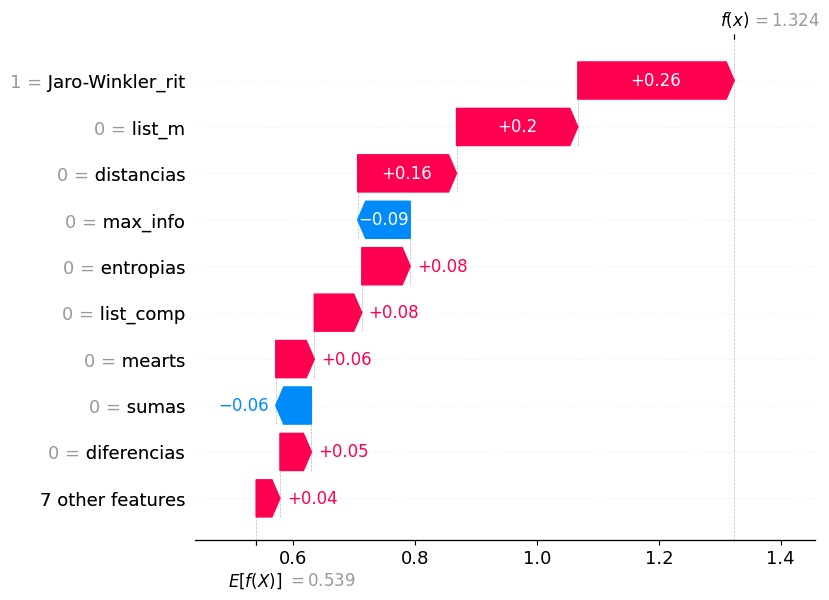

In [69]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

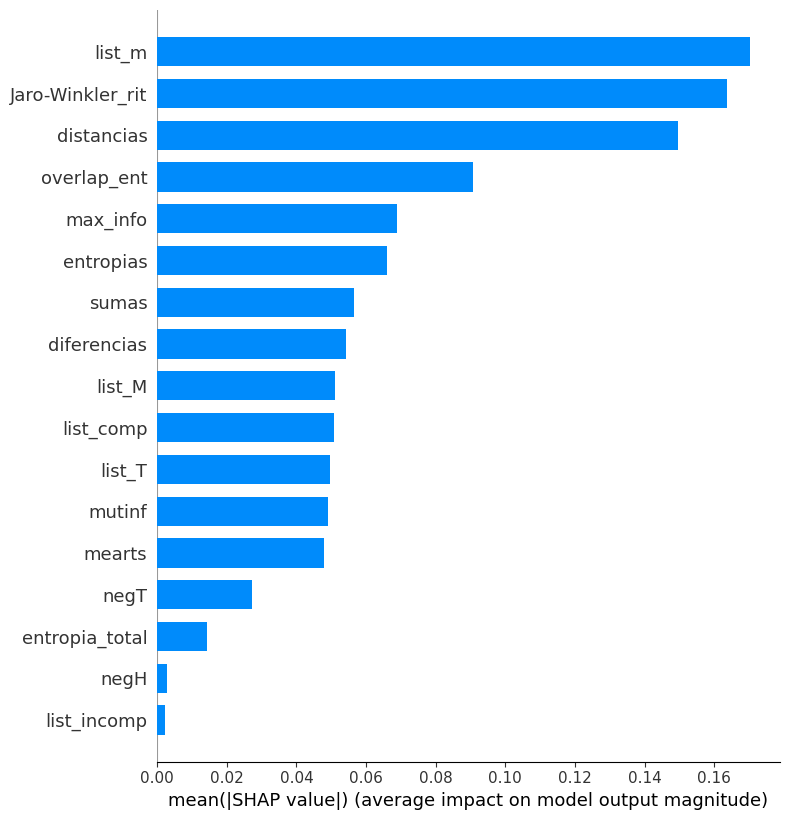

In [71]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

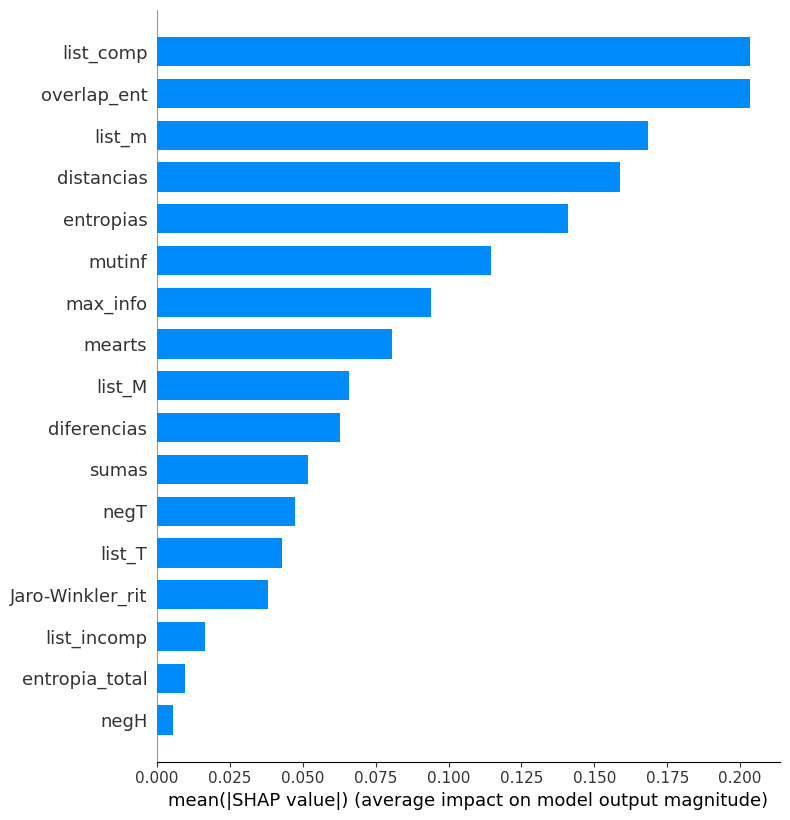

In [72]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

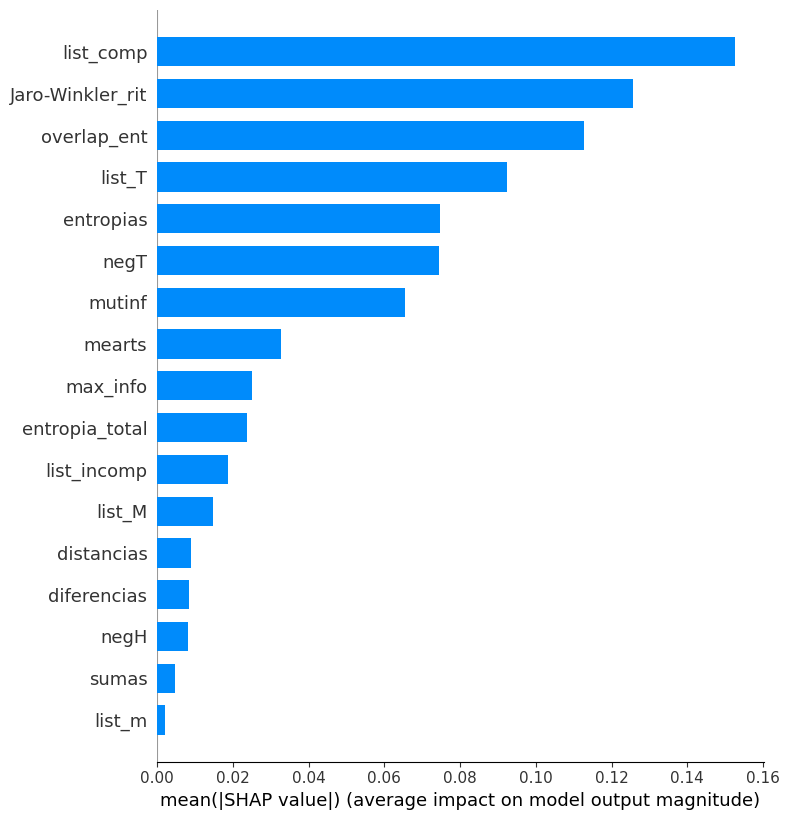

In [73]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

In [68]:
shap.summary_plot(shap_values[:,:1], X_test[1:,])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

IndexError: index 799 is out of bounds for axis 0 with size 798

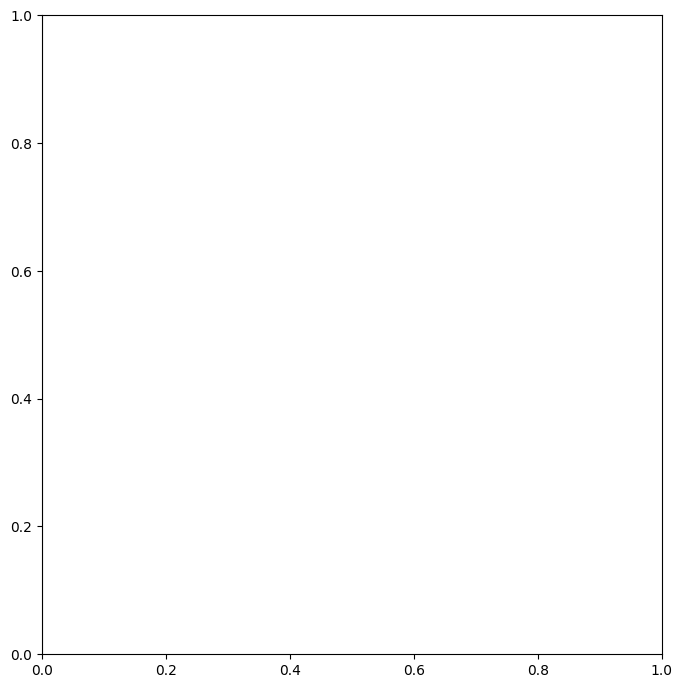

In [70]:
shap.summary_plot(shap_values[:,:,1], X_test[:-2],feature_names=test.columns[:-2])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

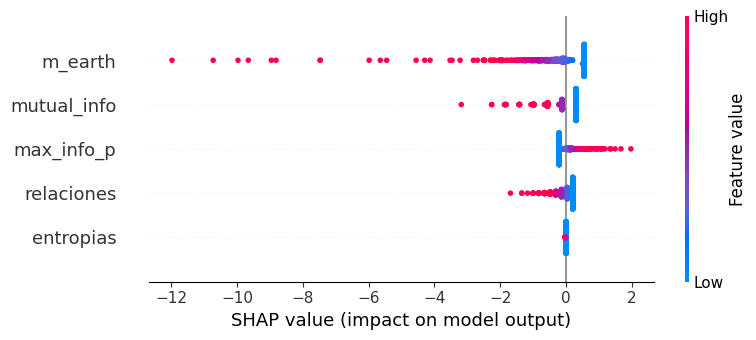

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


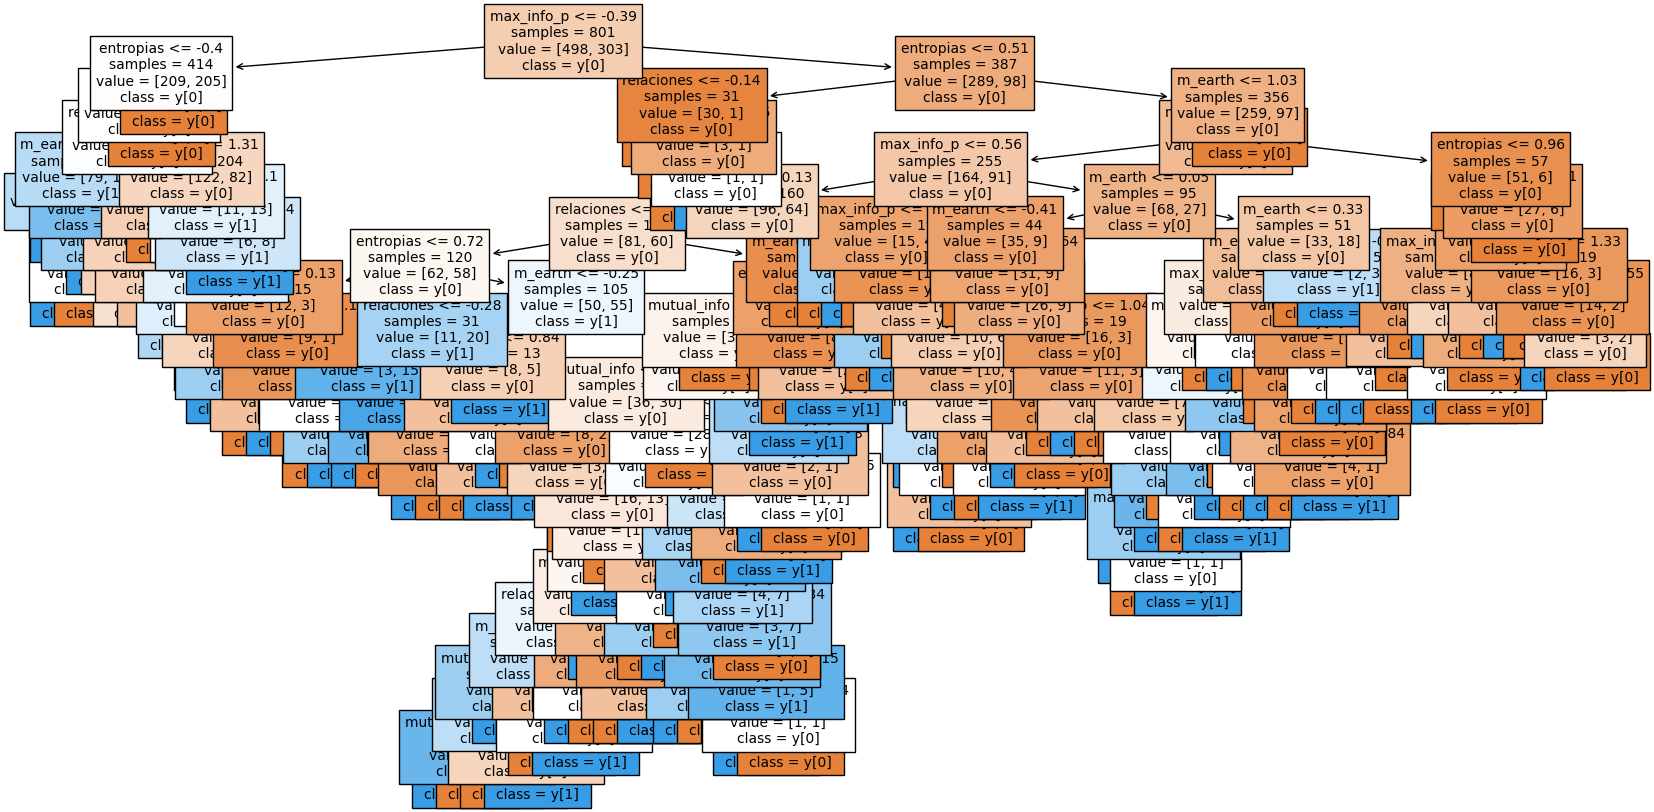

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )